In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test , y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

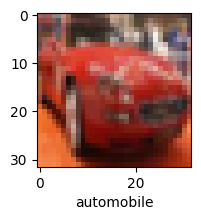

In [12]:
plot_sample(X_train,y_train,5)

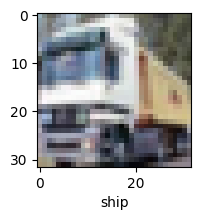

In [13]:
plot_sample(X_train,y_test,1)

In [14]:
X_train=X_train/255.0
X_test=X_test/255.0

## Implementing ANN Model

In [15]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 113s 71ms/step - loss: 1.8136 - accuracy: 0.3538
Epoch 2/5
 623/1563 [==========>...................] - ETA: 1:08 - loss: 1.6509 - accuracy: 0.4162

KeyboardInterrupt: 

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n', classification_report(y_test,y_pred_classes))

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

## Implementing a CNN Model

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [18]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 14ms/step - loss: 1.4644 - accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1068 - accuracy: 0.6133
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9868 - accuracy: 0.6564
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9076 - accuracy: 0.6845
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8436 - accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7898 - accuracy: 0.7259
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7400 - accuracy: 0.7416
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6994 - accuracy: 0.7552
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6561 - accuracy: 0.7705
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9559 - accuracy: 0.6929


[0.9559052586555481, 0.6929000020027161]

In [20]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.2706306e-02, 1.2488369e-04, 5.3074176e-04, 8.7248504e-01,
        3.1199286e-04, 3.4138847e-02, 2.9220781e-03, 1.0364474e-04,
        7.6329760e-02, 3.4657904e-04],
       [2.1583695e-05, 8.0946852e-03, 2.0540440e-07, 1.6856417e-07,
        3.4762067e-08, 6.5282824e-10, 3.9926586e-08, 1.0715611e-09,
        9.9186301e-01, 2.0272953e-05],
       [6.1008735e-03, 3.8301315e-02, 7.1718096e-04, 9.4227795e-04,
        5.0900842e-04, 2.4573708e-05, 1.4217514e-04, 1.0890078e-04,
        9.4732016e-01, 5.8334987e-03],
       [5.2657712e-01, 3.7039317e-02, 9.4735520e-03, 2.9781542e-03,
        7.1761361e-04, 6.6732930e-05, 8.0914597e-04, 1.4239474e-05,
        4.2186290e-01, 4.6125404e-04],
       [3.1344014e-06, 3.0276016e-04, 3.8254458e-02, 2.0352878e-02,
        3.5941732e-01, 1.9326019e-03, 5.7961315e-01, 1.3857981e-06,
        1.2156749e-04, 7.0965240e-07]], dtype=float32)

In [21]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

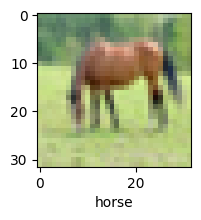

In [23]:
plot_sample(X_test,y_test,60)

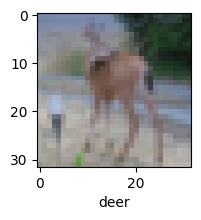

In [24]:
plot_sample(X_test,y_test,100)

In [25]:
classes[y_classes[4]]

'frog'

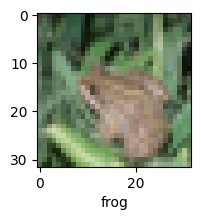

In [26]:
plot_sample(X_test,y_test,4)

In [29]:
print('Classification report: \n', classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1000
           1       0.76      0.83      0.80      1000
           2       0.62      0.56      0.59      1000
           3       0.51      0.51      0.51      1000
           4       0.76      0.55      0.64      1000
           5       0.67      0.52      0.59      1000
           6       0.75      0.78      0.77      1000
           7       0.70      0.79      0.74      1000
           8       0.72      0.86      0.79      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [30]:
import cv2
img_path='bird.jpeg'
img_arr=cv2.imread(img_path).astype('float32')
img_arr

array([[[ 65.,  81.,  63.],
        [ 65.,  81.,  63.],
        [ 65.,  81.,  63.],
        ...,
        [ 74.,  85.,  69.],
        [ 73.,  84.,  68.],
        [ 73.,  84.,  68.]],

       [[ 66.,  82.,  64.],
        [ 66.,  82.,  64.],
        [ 66.,  82.,  64.],
        ...,
        [ 73.,  84.,  68.],
        [ 73.,  84.,  68.],
        [ 72.,  83.,  67.]],

       [[ 67.,  83.,  65.],
        [ 67.,  83.,  65.],
        [ 67.,  83.,  65.],
        ...,
        [ 73.,  84.,  68.],
        [ 73.,  84.,  68.],
        [ 72.,  83.,  67.]],

       ...,

       [[195., 189., 206.],
        [194., 188., 205.],
        [192., 186., 203.],
        ...,
        [ 53.,  64.,  56.],
        [ 52.,  63.,  55.],
        [ 52.,  63.,  55.]],

       [[194., 188., 205.],
        [193., 187., 204.],
        [192., 186., 203.],
        ...,
        [ 52.,  63.,  55.],
        [ 52.,  63.,  55.],
        [ 52.,  63.,  55.]],

       [[194., 188., 205.],
        [193., 187., 204.],
        [192., 1

In [31]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))